Problem Statement:
* Say a player always hits stream 100ms early, but always hits jacks 100ms late. Predict this player's drift.

Definitions:
* Stream is a rhythm game pattern where no two consecutive chords contain the same tracks (aka lanes).
* For this problem, assume jacks are any two consecutive chords that contain any of the same tracks.
* Drift is the difference between the chord's time position and the time the player hit the chord. By convention, early is negative, late is positive.

In [219]:
import torch
import matplotlib.pyplot as plt

Predict using a statistical bigram model

In [9]:
def has_overlap(c1, c2):
    for i in range(4):
        if c1[i] == "1" and c2[i] == c1[i]:
            return True
    return False

In [11]:
chords = [f"{i:04b}" for i in range(16)]

itoc = {i:c for i,c in enumerate(chords)}
ctoi = {c:i for i,c in itoc.items()}

D = torch.zeros(16, 16).int().tolist()
for c1 in chords:
    for c2 in chords:
        drift = 100 if has_overlap(c1, c2) else -100
        idx1 = ctoi[c1]
        idx2 = ctoi[c2]
        D[idx1][idx2] = drift

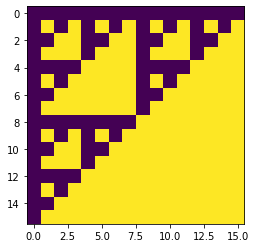

In [12]:
plt.imshow(D)

Predict using a neural net bigram model

In [16]:
xs, ys = [], []

for c1 in chords:
    for c2 in chords:
        idx1 = ctoi[c1]
        idx2 = ctoi[c2]
        xs.append((idx1, idx2))

        drift = 100 if has_overlap(c1, c2) else -100
        ys.append(drift)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [54]:
g = torch.manual_seed(1337)
D = torch.randn(16, 16, generator=g, requires_grad=True)

In [216]:
num_epochs = 1
learning_rate = 10

for _ in range(num_epochs):
    y_pred = D[xs[:,0], xs[:,1]]
    loss = ((y_pred - ys) ** 2).mean()

    D.grad = None
    loss.backward()

    D.data -= learning_rate * D.grad

loss.item()

3.554870772859431e-06

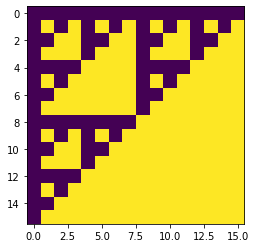

In [217]:
plt.imshow(D.tolist())

In [218]:
D

tensor([[-99.9983, -99.9983, -99.9983, -99.9983, -99.9983, -99.9983, -99.9982,
         -99.9983, -99.9983, -99.9982, -99.9983, -99.9983, -99.9983, -99.9983,
         -99.9983, -99.9982],
        [-99.9982,  99.9983, -99.9983,  99.9983, -99.9983,  99.9983, -99.9982,
          99.9983, -99.9983,  99.9982, -99.9983,  99.9983, -99.9983,  99.9982,
         -99.9982,  99.9983],
        [-99.9983, -99.9983,  99.9983,  99.9983, -99.9983, -99.9982,  99.9982,
          99.9983, -99.9983, -99.9983,  99.9983,  99.9982, -99.9983, -99.9983,
          99.9983,  99.9983],
        [-99.9982,  99.9982,  99.9983,  99.9983, -99.9983,  99.9983,  99.9983,
          99.9982, -99.9982,  99.9982,  99.9983,  99.9983, -99.9982,  99.9983,
          99.9983,  99.9983],
        [-99.9983, -99.9983, -99.9983, -99.9983,  99.9983,  99.9983,  99.9983,
          99.9982, -99.9982, -99.9983, -99.9983, -99.9983,  99.9982,  99.9983,
          99.9983,  99.9983],
        [-99.9982,  99.9982, -99.9982,  99.9983,  99.9982,  